# **Linear  Regression**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy import stats

In [3]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

In [4]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x): return slope * x + intercept
mymodel = list(map(myfunc, x))

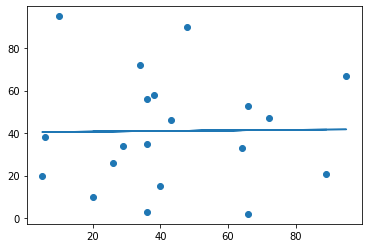

In [5]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [6]:
print(r)

0.01331814154297491


# **Polynomial Regression** 

In [8]:
import numpy as np

In [7]:
x1 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y1 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

In [9]:
mymodel1= np.poly1d(np.polyfit(x1, y1, 3))

In [13]:
myline = np.linspace(1, 22,100)

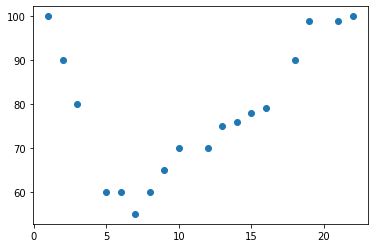

In [11]:
plt.scatter(x1, y1)
plt.plot(myline, mymodel1(myline))
plt.show()

In [14]:
from sklearn.metrics import r2_score
print(r2_score(y1, mymodel1(x1)))
print(mymodel1(17))

0.9432150416451025
88.87331269697991


# **Multiple Regression**

**Using Cars Dataset**

In [15]:
df = pd.read_csv('/content/cars.csv.csv')

In [21]:
X = df[['Weight', 'Volume']]
Y = df['CO2']

In [19]:
from sklearn import linear_model

In [22]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [23]:
print(regr.coef_)

[0.00755095 0.00780526]


In [24]:
predictedCO2 = regr.predict([[2300, 1300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [25]:
print(predictedCO2)

[107.2087328]


**Using 50 start ups datasets**

In [26]:
df1 = pd.read_csv('/content/50_Startups.csv')

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Encoding Dummy Variables:**

As we have one categorical variable (State), which cannot be directly applied to the model, so we will encode it. To encode
the categorical variable into numbers, we will use the LabelEncoder class. But it is not sufficient because it still has some
relational order, which may create a wrong model. So in order to remove this problem, we will use OneHotEncoder, which
will create the dummy variables. Below is code for it:

In [27]:
X1= df1.iloc[:, :-1].values
Y1= df1.iloc[:, 4].values

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X1= LabelEncoder()

In [37]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [38]:
#perform one-hot encoding on 'State' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df1[['State']]).toarray())

In [39]:
#merge one-hot encoded columns back with original DataFrame
final_df = df1.join(encoder_df)

In [47]:
final_df

,R&D Spend,Administration,Marketing Spend,State,Profit,0,1,2
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0
5,131876.90,99814.71,362861.36,New York,156991.12,0.0,0.0,1.0
6,134615.46,147198.87,127716.82,California,156122.51,1.0,0.0,0.0
7,130298.13,145530.06,323876.68,Florida,155752.60,0.0,1.0,0.0
8,120542.52,148718.95,311613.29,New York,152211.77,0.0,0.0,1.0
9,123334.88,108679.17,304981.62,California,149759.96,1.0,0.0,0.0


In [42]:
#drop ' State' column
final_df.drop('State', axis=1, inplace=True)

,R&D Spend,Administration,Marketing Spend,State,Profit,0,1,2
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0
5,131876.90,99814.71,362861.36,New York,156991.12,0.0,0.0,1.0
6,134615.46,147198.87,127716.82,California,156122.51,1.0,0.0,0.0
7,130298.13,145530.06,323876.68,Florida,155752.60,0.0,1.0,0.0
8,120542.52,148718.95,311613.29,New York,152211.77,0.0,0.0,1.0
9,123334.88,108679.17,304981.62,California,149759.96,1.0,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split

In [56]:
X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, test_size= 0.2, random_state=10)

In [57]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X1_train, Y1_train)

LinearRegression()

In [58]:
#Predicting the Test set result;
Y1_pred= regressor.predict(X1_test)

# **Using Salary Data**

In [59]:
df2 = pd.read_csv('/content/salary_data.csv.csv')

In [60]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X2= df2.iloc[:, :-1].values
Y2=df2.iloc[:, 1].values
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=1/3, random_state=0)

In [61]:
regressor = linear_model.LinearRegression()
regressor.fit(X2_train, Y2_train)

LinearRegression()

In [62]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [9345.94244312]


**Plotting for residuals**

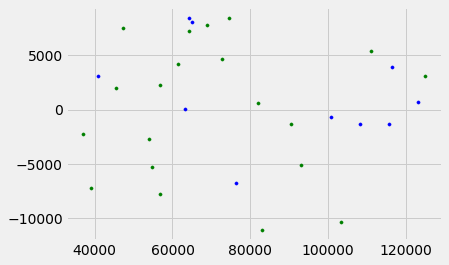

In [64]:
## setting plot style
plt.style.use('fivethirtyeight')
## plotting residual errors in training data
plt.scatter(regressor.predict(X2_train), regressor.predict(X2_train) - Y2_train,
color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(regressor.predict(X2_test), regressor.predict(X2_test) - Y2_test,
color = "blue", s = 10, label = 'Test data')

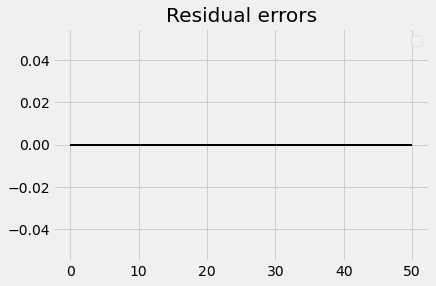

In [68]:
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
## plotting legend
plt.legend(loc = 'upper right')
## plot title
plt.title("Residual errors")
## method call for showing the plot
plt.show()

In [69]:
#Prediction of Test and Training set result
Y2_pred= regressor.predict(X2_test)
X2_pred= regressor.predict(X2_train)

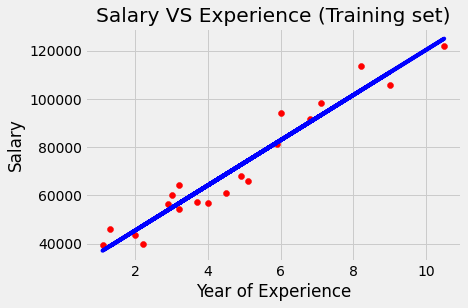

In [71]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X2_train, Y2_train, color='red')
viz_train.plot(X2_train, X2_pred, color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

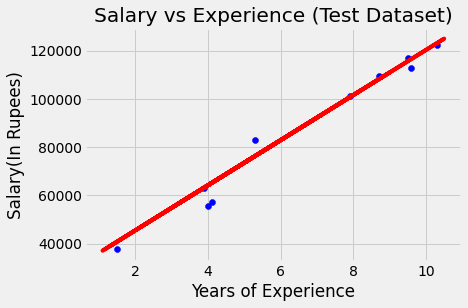

In [72]:
#visualizing the Test set results
plt.scatter(X2_test, Y2_test, color="blue")
plt.plot(X2_train, X2_pred, color="red")
plt.title("Salary vs Experience (Test Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()